### Aditya Dixit
### Intro to AI: Pandas Introduction
### Part 5

In [1]:
# Render our plots inline
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Make the graphs a bit prettier, and bigger
plt.style.use('ggplot')
#Just ended up using the color codes
sns.set(color_codes=True)

Write a function that will read in the breast cancer dataset. I added the column names manually since they were not in the dataset. 

In [2]:
colnames=['Class', 'age', 'menopause', 'tumor-size','inv-nodes','node-caps','deg-malig', 'breast', 'breast-quad', 'irradiat'] 
cancer = pd.read_csv("breast-cancer.data", header =None, names= colnames)

See the dataset

In [4]:
cancer

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no
...,...,...,...,...,...,...,...,...,...,...
281,recurrence-events,30-39,premeno,30-34,0-2,no,2,left,left_up,no
282,recurrence-events,30-39,premeno,20-24,0-2,no,3,left,left_up,yes
283,recurrence-events,60-69,ge40,20-24,0-2,no,1,right,left_up,no
284,recurrence-events,40-49,ge40,30-34,3-5,no,3,left,left_low,no


Next, I wrote a function that determines the most common classification for the breast cancer data. (either 'recurrence' or 'no-recurrence')

In [5]:
classification_counts = cancer['Class'].value_counts()
classification_counts[:2]

no-recurrence-events    201
recurrence-events        85
Name: Class, dtype: int64

I then placed the class on the bar graph!

<AxesSubplot:>

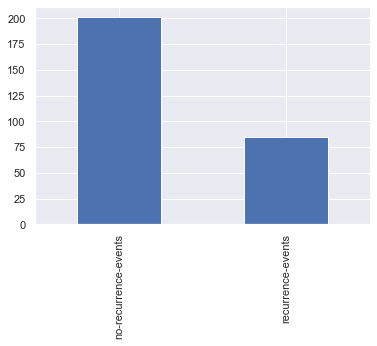

In [6]:
classification_counts[:2].plot(kind='bar')


After that, I went ahead and  wrote a function that determines the most common value for age and menopause for patients with recurrences?

In [7]:
is_reoccur = cancer['Class'] == "recurrence-events"
paitents_recurrences = cancer[is_reoccur]


In [8]:
paitents_recurrences

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
201,recurrence-events,50-59,premeno,15-19,0-2,no,2,left,left_low,no
202,recurrence-events,40-49,premeno,40-44,0-2,no,1,left,left_low,no
203,recurrence-events,50-59,ge40,35-39,0-2,no,2,left,left_low,no
204,recurrence-events,50-59,premeno,25-29,0-2,no,2,left,right_up,no
205,recurrence-events,30-39,premeno,0-4,0-2,no,2,right,central,no
...,...,...,...,...,...,...,...,...,...,...
281,recurrence-events,30-39,premeno,30-34,0-2,no,2,left,left_up,no
282,recurrence-events,30-39,premeno,20-24,0-2,no,3,left,left_up,yes
283,recurrence-events,60-69,ge40,20-24,0-2,no,1,right,left_up,no
284,recurrence-events,40-49,ge40,30-34,3-5,no,3,left,left_low,no


In [9]:
paitents_recurrences['age'].value_counts()

40-49    27
50-59    25
60-69    17
30-39    15
70-79     1
Name: age, dtype: int64

In [10]:
paitents_recurrences['menopause'].value_counts()

premeno    48
ge40       35
lt40        2
Name: menopause, dtype: int64

Finally, I wrote a function that plots the number of recurrences for each age group

In [11]:
reoccur =paitents_recurrences[['Class','age']].copy()

In [12]:
reoccur

,Class,age
201,recurrence-events,50-59
202,recurrence-events,40-49
203,recurrence-events,50-59
204,recurrence-events,50-59
205,recurrence-events,30-39
...,...,...
281,recurrence-events,30-39
282,recurrence-events,30-39
283,recurrence-events,60-69
284,recurrence-events,40-49


In [26]:
reoccur_counts = reoccur['age'].value_counts()
reoccur_counts[:4]

40-49    27
50-59    25
60-69    17
30-39    15
Name: age, dtype: int64

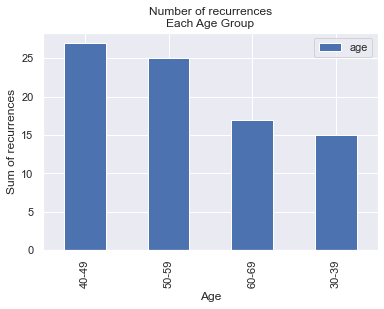

In [27]:
reoccur_counts[:4].plot(kind='bar')
plt.xlabel('Age')
plt.ylabel('Sum of recurrences')
plt.title('Number of recurrences\nEach Age Group')
plt.legend()
plt.show()